## Agglomerative Hierarchical Clustering [Random dataset]

### Importing

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Random dataset

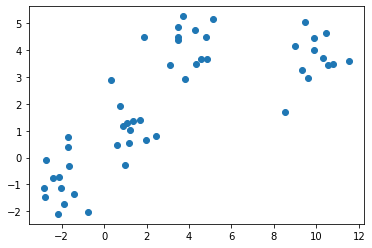

In [2]:
from sklearn.datasets._samples_generator import make_blobs 

X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

### Modeling

In [3]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

Fitting

In [4]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

### Visualization

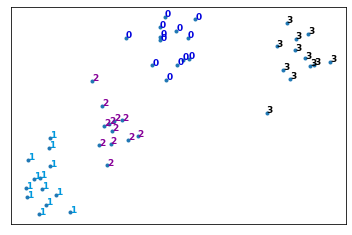

In [5]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
# plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

### Dendogram

Distance Matrix

In [6]:
from scipy.spatial import distance_matrix 

dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.43694922 1.01833762 ... 0.69831002 0.18171098 0.13138496]
 [0.43694922 0.         1.17889168 ... 0.85082951 0.53279827 0.54874703]
 [1.01833762 1.17889168 0.         ... 0.33283894 0.8412051  1.0813846 ]
 ...
 [0.69831002 0.85082951 0.33283894 ... 0.         0.52836944 0.77544451]
 [0.18171098 0.53279827 0.8412051  ... 0.52836944 0.         0.24831342]
 [0.13138496 0.54874703 1.0813846  ... 0.77544451 0.24831342 0.        ]]


Complete Linkage

C:\Users\chinm\AppData\Local\Temp\ipykernel_17800\1644193267.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


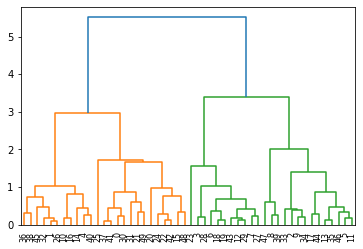

In [7]:
from scipy.cluster import hierarchy 

Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)